In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Jack's Car Rental Problem


Jack manages two locations for a nationwide car rental company. Each day, some number of customers arrive at each location to rent cars. If Jack has a car available, he rents it out and is credited \$10 by the national company. If he is out of cars at that location, then the business is lost. Cars become available for renting the day after they are returned. To help ensure that cars are available where they are needed, Jack can move them between the two locations overnight, at a cost of \$2 per car moved. We assume that the number of cars requested and returned at each location are Poisson random variables, meaning that the probability that the number is $n$ is $\frac{\lambda^n}{n!}e^{-\lambda}$, where $\lambda $ is the expected number. Suppose $\lambda $ is 3 and 4 for rental requests at the first and second locations and 3 and 2 for returns. To simplify the problem slightly, we assume that there can be no more than 20 cars at each location (any additional cars are returned to the nationwide company, and thus disappear from the problem) and a maximum of five cars can be moved from one location to the other in one night. We take the discount rate to be and formulate this as a continuing finite MDP, where the time steps are days, the state is the number of cars at each location at the end of the day, and the actions are the net numbers of cars moved between the two locations overnight. 

In [48]:
def prob(n_rental_i, n_return_i, n_rental_j, n_return_j):    
    prb = np.double(np.exp(-12.0) * pow(3.0,n_rental_i) * pow(3.0,n_return_i) * pow(4.0,n_rental_j)\
    * pow(2.0,n_return_j)) / np.double(np.math.factorial(n_rental_i)) / np.double(np.math.factorial(n_return_i))\
    / np.double(np.math.factorial(n_rental_j)) / np.double(np.math.factorial(n_return_j))
    return prb


N = 21 # most number of cars in each place (plus 1)
V = np.zeros([N,N]) 

P = np.zeros([N,N]) # policy matrix, the value of which is how many cars to move from 2nd place to 1st place (num_car_1, num_car_2)
R = np.zeros([N,N]) # reward of one step(day), including cost

Pi = np.zeros([N,N,10]) # policy matrix in process
Vi = np.zeros([N,N,10])

gamma = 0.9 # discount factor

theta = 0.1 # error threshold


counter_whole = 0
policy_stable = 0

for k in range(5):
    
    #---------------------Policy Evaluation---------------------    
    delta = theta + 1.0 # intialization
    counter = 0
    while delta > theta:
        delta = 0
        for i in range(N):
            for j in range(N):
                tmp = 0
                total_proba_tmp = 0
                v = V[i,j]
                for n_return_i in range(15): 
                    for n_return_j in range(15):
                        for n_rental_i in range(15):
                            for n_rental_j in range(15):
                                n_move = P[i,j]
                                ip = n_return_i + i + n_move - n_rental_i
                                jp = n_return_j + j - n_move - n_rental_j
                                
                                if ip > N-1:
                                    ip_com = N-1 # the rebundant cars going to the national wide company
                                elif n_rental_i > i:
                                    ip_com = max(n_move + n_return_i,0) # if the all cars have been rent
                                    if ip_com > N-1:
                                        ip_com = N-1 # the rebundant cars going to the national wide company
                                else:
                                    ip_com = ip
                                    
                                if jp > N-1:
                                    jp_com = N-1 # the rebundant cars going to the national wide company
                                elif n_rental_j > j:
                                    jp_com = max(-n_move + n_return_j,0) # if the all cars have been rent
                                    if jp_com > N-1:
                                        jp_com = N-1 # the rebundant cars going to the national wide company
                                else:
                                    jp_com = jp      
                                    
#                                 if i ==0 and j==0:
#                                      print(i,j,ip_com,jp_com,n_rental_i, int(n_return_i), int(n_rental_j), int(n_return_j))
                                n_rental_i_com = min(i,n_rental_i)
                                n_rental_j_com = min(j,n_rental_j) 
        
                                pb = prob(n_rental_i, n_return_i, n_rental_j, n_return_j)
                                tmp += pb * (10.0*(n_rental_i_com + n_rental_j_com) - np.abs(2.0 * n_move))  # expected reward
                                tmp += pb * gamma * V[int(ip_com),int(jp_com)] # next step value 
                                total_proba_tmp += pb
                                    
                delta = max(delta,abs(v-tmp))
                V[i,j] = tmp
                print('i:%d, j:%d,total_prob:%f ,V:%f'%(i,j,total_proba_tmp ,tmp),'\r',end="")
        counter += 1
        print('\n policy evaluation iteration:%d'%counter,'\n',end="")

    
    #---------------------Policy Improvement---------------------
    while not policy_stable:
        policy_stable = 1
        for i in range(N):
            for j in range(N):
                b = P[i,j]
                n_move_range = np.linspace(-i,j,i+j+1)
                tmp_move_max = 0
                n_move_best = 0
                for n_move in n_move_range:
                    n_move = int(n_move)
                    tmp_move = 0
                    
                    for n_return_i in range(15): 
                        for n_return_j in range(15):
                            for n_rental_i in range(15):
                                for n_rental_j in range(15):
                                    

                                    ip = n_return_i + i + n_move - n_rental_i
                                    jp = n_return_j + j - n_move - n_rental_j

                                    if ip > N-1:
                                        ip_com = N-1 # the rebundant cars going to the national wide company
                                    elif n_rental_i >  i:
                                        ip_com = max(n_move + n_return_i, 0) # if the all cars have been rent
                                        if ip_com > N-1:
                                            ip_com = N-1 # the rebundant cars going to the national wide company
                                    else:
                                        ip_com = ip

                                    if jp > N-1:
                                        jp_com = N-1 # the rebundant cars going to the national wide company
                                    elif n_rental_j > j:
                                        jp_com = max(-n_move + n_return_j, 0) # if the all cars have been rent
                                        if jp_com > N-1:
                                            jp_com = N-1 # the rebundant cars going to the national wide company
                                    else:
                                        jp_com = jp

                                    n_rental_i_com = min(i,n_rental_i)
                                    n_rental_j_com = min(j,n_rental_j)

                                    pb = prob(n_rental_i, n_return_i, n_rental_j, n_return_j)
                                    tmp_move += pb * (10.0*(n_rental_i_com + n_rental_j_com) - np.abs(2.0 * n_move))  # expected reward
                                    tmp_move += pb * gamma * V[int(ip_com),int(jp_com)] # next step value

                    if tmp_move > tmp_move_max:
                        n_move_best = n_move                    
                    tmp_move_max = max(tmp_move_max,tmp_move)

                        
                P[i,j] = n_move_best
                
                if not b==P[i,j]:
                    policy_stable = 0
    Vi[:,:,counter_whole] = V
    Pi[:,:,counter_whole] = P
    counter_whole += 1
    
    print('\n-------Iteration:%d'%counter_whole,'----------\n',end="")

i:20, j:20,total_prob:0.999979 ,V:193.334074 
 policy evaluation iteration:1 
i:20, j:20,total_prob:0.999979 ,V:308.112946 
 policy evaluation iteration:2 
i:20, j:20,total_prob:0.999979 ,V:383.959915 
 policy evaluation iteration:3 
i:20, j:20,total_prob:0.999979 ,V:436.049905 
 policy evaluation iteration:4 
i:20, j:20,total_prob:0.999979 ,V:473.291588 
 policy evaluation iteration:5 
i:20, j:20,total_prob:0.999979 ,V:501.034159 
 policy evaluation iteration:6 
i:20, j:20,total_prob:0.999979 ,V:522.401926 
 policy evaluation iteration:7 
i:20, j:20,total_prob:0.999979 ,V:539.241659 
 policy evaluation iteration:8 
i:20, j:20,total_prob:0.999979 ,V:552.703240 
 policy evaluation iteration:9 
i:20, j:20,total_prob:0.999979 ,V:563.555175 
 policy evaluation iteration:10 
i:20, j:20,total_prob:0.999979 ,V:572.346508 
 policy evaluation iteration:11 
i:20, j:20,total_prob:0.999979 ,V:579.489623 
 policy evaluation iteration:12 
i:20, j:20,total_prob:0.999979 ,V:585.304482 
 policy evaluat

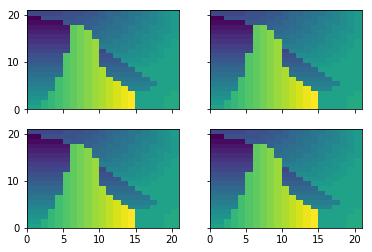

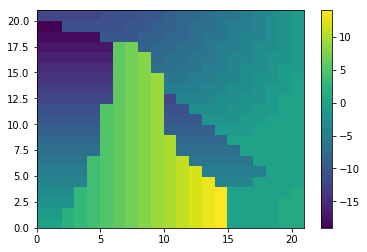

In [49]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.pcolor(Pi[:,:,0])
ax2.pcolor(Pi[:,:,1])
ax3.pcolor(Pi[:,:,2])
ax4.pcolor(Pi[:,:,3])

plt.figure()
plt.pcolor(P)
plt.colorbar()

plt.show()



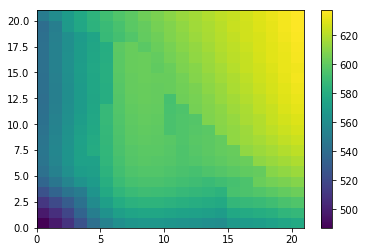

In [50]:
plt.pcolor(V)
plt.colorbar()
plt.show()